# Sistemas Dinámicos - Estabilidad, Controlabilidad, Observabilidad
> Gerardo de J. Becerra B.  
> Facultad de Ingeniería, Pontificia Universidad Javeriana.  
> Bogotá, Colombia.

## 1. Estabilidad
Muchos sistemas dinámicos son diseñados para realizar alguna tarea o procesar señales. Si un sistema no es estable éste puede destruirse o saturarse cuando una señal de entrada / disturbio sea aplicado, sin importar lo pequeño que éste sea. Por lo tanto, en la práctica, un sistema inestable no es muy útil, por lo que la estabilidad es un requerimiento práctico para muchos sistemas. Por ésta razón es importante desarrollar métodos para analizar los diferentes tipos de estabilidad de los sistemas.

Dependiendo del tipo de respuesta analizada (estado cero / entrada cero), se consideran a continuación dos tipos de estabilidad: estabilidad externa y estabilidad interna.

### 1.1. Estabilidad Externa
Considere un sistema SISO lineal, invariante en el tiempo, descrito por la ecuación $$y(t) = \int_0^t g(t-\tau)u(\tau)d\tau$$ donde $g(t)$ es la respuesta impulso del sistema. Se asume que el sistema es causal y que se encuentra inicialmente *relajado* en $t=0$.
Se dice que una entrada $u(t)$ es limitada (bounded) si $u(t)$ no crece indefinidamente, es decir, existe una constante $u_m$ tal que $|u(t)| \leq u_m \le \infty$ para todo $t \leq 0$.
Se dice entonces que un sistema es **BIBO estable** (Bounded input, bounded output) si para toda entrada acotada produce una salida acotada. Dicha estabilidad se define para la respuesta a estado-cero del sistema y se puede aplicar sólo si el sistema se encuentra inicialmente relajado.

---
**Teorema 1:** Un sistema es BIBO estable si y sólo si $g(t)$ es absolutamente integrable en el intervalo $[0,\infty)$
$$\int_0^\infty \left|g(t)\right|dt \leq M < \infty$$ para alguna constante $M$.

---

Cuando el sistema considerado se define en términos de una función de transferencia, la estabilidad BIBO se puede considerar a partir del siguente teorema.

---
**Teorema 2:** Un sistema con función de transferencia racional propia $G(s)$ es BIBO estable si y sólo si todos los polos de $G(s)$ tienen parte real negativa (o se encuentran en el lado izquierdo del semiplano complejo, sin incluir el eje imaginario.

---

### Ejemplo 1:
Considere el sistema dado por la ecuación diferencial $\ddot{y} + \dot{y} - 2y = \dot{u} - u$. Verifique si el sistema es BIBO estable.

Aplicando la transformada de Laplace, se puede verificar que la función de transferencia del sistema correspondiente es
$$G(s) = \frac{Y(s)}{U(s)} = \frac{s-1}{s^2+s-2}$$
Utilizando Matlab para graficar la respuesta impulso se obtiene:


G =
 
     s - 1
  -----------
  s^2 + s - 2
 
Continuous-time transfer function.



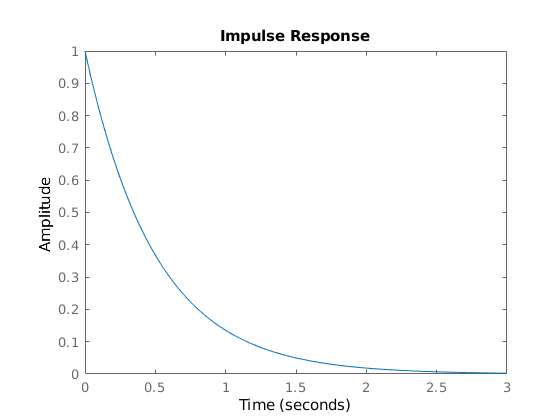

In [18]:
G = tf([1 -1],[1 1 -2])
impulse(G)

Con base en el teorema 1 y por simple inspección de la anterior figura, se puede decir que la respuesta impulso del sistema es absolutamente integrable en $[0,\infty)$, por lo cual se puede afirmar que el sistema es BIBO estable. Ahora, utilizando el teorema 2 se calculan los polos de la función de transferencia:

In [20]:
pole(minreal(G))


ans =

    -2



Como todos los polos tienen parte real negativa, se confirma que el sistema es BIBO estable. En particular, al aplicar un paso a la entrada (señal acotada) se obtiene la siguiente salida acotada:

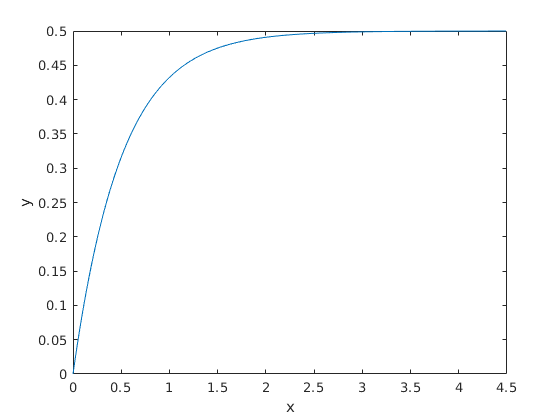

In [36]:
[y,t,x] = step(G);
plot(t,y), xlabel('x'), ylabel('y')

Es importante hacer énfasis en que encontrar que la salida es acotada para algunas entradas acotadas no es suficiente para demostrar la estabilidad BIBO. Es suficiente con encontrar una sóla entrada acotada que sea acotada y produzca una salida no acotada para afirmar que no es BIBO estable.

#### Estabilidad Externa para Sistemas Discretos
De manera análoga, para el caso de sistemas discretos se tienen los siguientes resultados.

---
**Teorema 3:** Un sistema de tiempo discreto es BIBO estable si y sólo si su respuesta impulso $h(k)$ es absolutamente sumable en el intervalo $[0,\infty)$
$$\sum_0^\infty \left|h(k)\right| \leq M < \infty$$ para alguna constante $M$.

---

---
**Teorema 4:** Un sistema de tiempo discreto con función de transferencia racional propia $G(z)$ es BIBO estable si y sólo si todos los polos de $G(z)$ tienen magnitud menor a 1 (se encuentran dentro del circulo unitario en el plano complejo).

---

## 1.2. Estabilidad Interna
La estabilidad interna se estudia para el caso de respuesta a entrada cero. Considerando un sistema lineal, invariante en el tiempo:
$$\dot{x}(t) = A x(t)$$
se desea conocer si el sistema es internamente estable para una condición inicial $x_0$. En la siguiente figura se presentan 3 diferentes condiciones iniciales para el sistema. Intuitivamente, ¿qué podría afirmarse sobre su estabilidad interna?

![stability](img/stability.png)

Se presentan las siguientes definiciones:
1. El sistema es **estable en el sentido de Lyapunov** si todo estado inicial finito genera una respuesta limitada del estado.
2. El sistema es **asintóticamente estable** si todo estado inicial finito genera una respuesta limitada que tiende a cero cuando $t$ tiende al infinito.

![stability_lyapunov](img/stability_Lyapunov.png)

---
**Teorema 5:**
1. El sistema $\dot{x}(t) = A x(t)$ es asintóticamente estable si y sólo si todos los valores propios de $A$ tienen parte real negativa.
2. El sistema $\dot{x}(t) = A x(t)$ es marginalmente estable (Lyapunov estable) si y sólo si todos los valores propios de $A$ tienen parte real cero o negativa, y aquellos con parte real cero son raices simples del polinomio característico de A.
---

### Ejemplo 1 (continuación):
El sistema definido por la ecuación diferencial $\ddot{y} + \dot{y} - 2y = \dot{u} - u$ puede escribirse en la forma de variables de estado como:

$$
\dot{x} =
\begin{bmatrix}
    0 & 1\\ 2 & -1
\end{bmatrix}x +
\begin{bmatrix}
    0 \\ 1
\end{bmatrix}u
$$
$$
y =
\begin{bmatrix}
    -1 & 1
\end{bmatrix}x
$$
Los valores propios de la matriz $A$ se calculan como

In [23]:
A = [0 1; 2 -1];
eig(A)


ans =

     1
    -2



De éstos valores se puede concluir que el sistema no es asintóticamente ni marginalmente estable. Pero en la primera parte del ejemplo se concluyó que el sistema es BIBO estable. ¿Cómo es posible ésto?
Observe que la función de transferencia del sistema puede escribirse como
$$G(s) = \frac{Y(s)}{U(s)} = \frac{s-1}{s^2+s-2} = \frac{s-1}{(s+2)(s-1)} = \frac{1}{s+2}$$
En éste caso se presenta una cancelación polo/cero, por lo cual no todos los valores propios del sistema corresponden a polos. Por ésta razón el sistema es BIBO estable, pero no internamente estable. Por ejemplo, al calcular la respuesta del sistema ante una condición inicial $x(0) = [1,1]^\intercal$ se tiene :

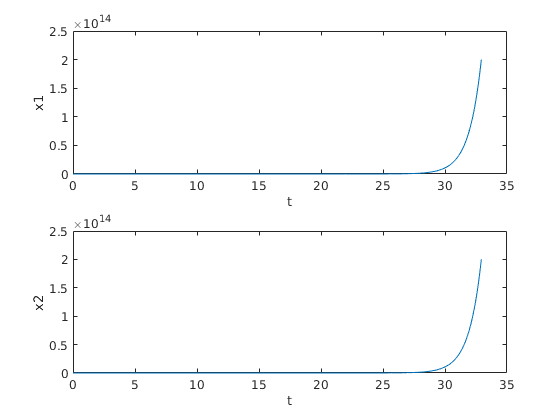

In [37]:
A = [0 1; 2 -1];
B = [0; 1];
C = [-1 1];
D = 0;
sys = ss(A,B,C,D);
[y,t,x] = initial(sys,[1,1]);
subplot(2,1,1), plot(t,x(:,1)), xlabel('t'), ylabel('x1')
subplot(2,1,2), plot(t,x(:,2)), xlabel('t'), ylabel('x2')

En general, se tiene que el conjunto de polos de $G(s)$ es un subconjunto de valores propios de $A$. Por lo tanto, se puede afirmar :
1. Si el sistema es asintóticamente estable, entonces el sistema es BIBO estable.
2. Si el sistema es BIBO estable, el sistema no necesariamente será asintóticamente estable.
3. Si el sistema no es asintóticamente estable, no se puede hacer afirmación alguna sobre su estabilidad BIBO.

#### Estabilidad Interna para Sistemas Discretos
De manera análoga, para el caso de sistemas discretos se tienen:

---
**Teorema 6:**
1. El sistema de tiempo discreto $x(k+1) = A x(k)$ es asintóticamente estable si y sólo si todos los valores propios de $A$ tienen magnitud menor a 1.
2. El sistema de tiempo discreto $x(k+1) = A x(k)$ es marginalmente estable (Lyapunov estable) si y sólo si todos los valores propios de $A$ tienen menor o igual a 1, y aquellos con magnitud igual a 1 son raices simples del polinomio característico de A.
---